# Practical work 2 : Fourier transform

This practial work is dedicated to the study of the discrete Fourier transform applied on the two following images:
![son.png](./img/son.png)
![sonrot.png](./img/sonrot.png)
and analyze the properties of their spectrum. To this end, we make use of the following functions provided by the module `numpy.fft`:

- `fft2()` to compute the Fourier transform on an image
- `fftshift()` to center the low frequencies
- `abs()` (from `numpy`) to compute the module of a complexe array

In most of cases, high frequencies have lower energy compare to low frequencies. We will use a logarithmic scale by applying $\log(1+abs(TF))$ to display the spectrum.

In [126]:
import numpy as np
from numpy.fft import fft2,fftshift
from PIL import Image
import matplotlib.pyplot as plt

son = np.array(Image.open('img/son.png'))
sonrot = np.array(Image.open('img/sonrot.png'))

## Exercice: properties of Fourier transform applied on natural images
1. Write the following functions:
 - `computeFT(I)` returning the Fourier transform of image `I`,
 - `toVisualizeFT(If)` returning the centered module of a complex array `If` (the Fourier transform of an image),
 - `toVisualizeLogFT(If)` similar to the previous function but use a logarithmic scale.

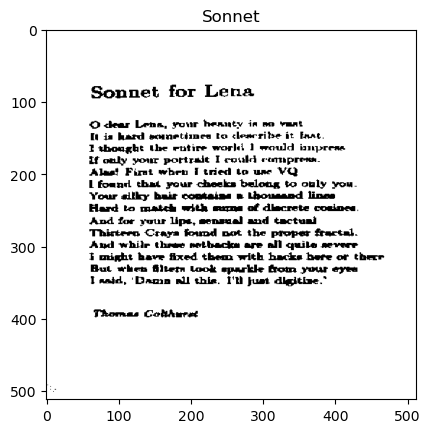


Centered module of the complex array




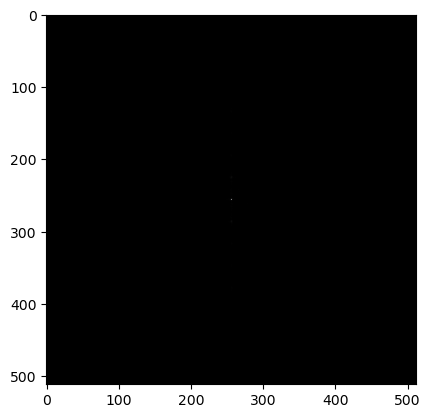


Centered module of the complex array using a logarithmic scale:




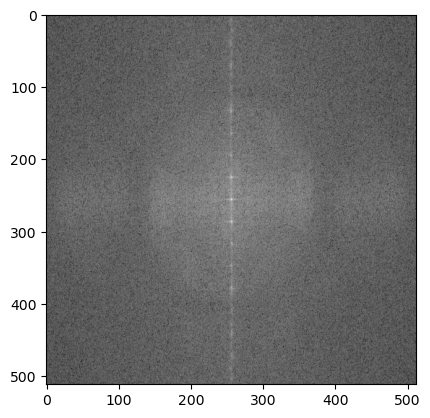

To have a perception of the range and form of the density spectrum of a picture it is useful to plot it using a 
 logaritmic scale


In [127]:
def computeFT(I):
    """ Array -> Array[complex] """
    array = np.array(I)
    return fft2(array)

def toVisualizeFT(If):
    """ Array[complex] -> Array[float] """
    return np.abs(fftshift(If))

def toVisualizeLogFT(If):
    """ Array[complex] -> Array[float] """
    return np.log10(toVisualizeFT(If))

complex_array = computeFT(son)
plt.imshow(son, cmap='gray')
plt.title('Sonnet')
plt.show()
#print('\nComplex array:\n\n')
#print(complex_array)
print('\nCentered module of the complex array\n\n')
x = toVisualizeFT(complex_array)
#print(x)
plt.imshow(x, cmap = 'gray')
plt.show()
print('\nCentered module of the complex array using a logarithmic scale:\n\n')
y = toVisualizeLogFT(complex_array)
#print(y)
plt.imshow(y, cmap='gray')
plt.show()

print('To have a perception of the range and form of the density spectrum of a picture it is useful to plot it using a \n logaritmic scale')

Given a 2D non periodic signal, such as an image, we can build its Fourier Transform. Since by its definition the FT uses a complex exponential, the DFT of an image is possibly complex, so it cannot be displayed in a single image.
For this reason we can study its behaviour by plotting its modulus.
As it can be seen, the plotting of the modulus of the FT of the image itself does not tell us much, and to really appreciate the details and differences in the frequencies we will use the logaritmic scale of the absolute value of its modulus.

2. Write a series of instructions that
 - compute the Fourier transform of `son` and `sonrot`,
 - compute and display the module using a logarithmic scale,
 - threshold the module with a parameter of $1.10^5$ (use the function of TME1)
 - display the thresholded spectrum

SONNET:



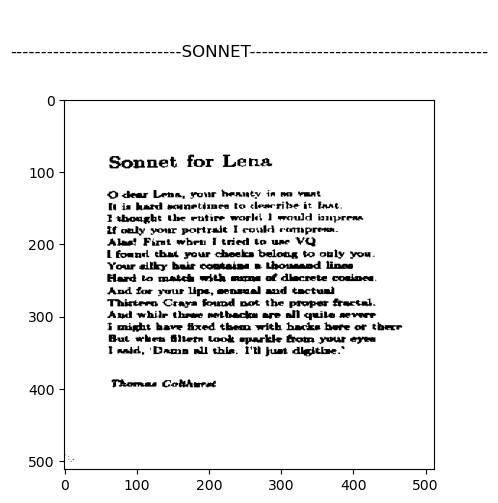

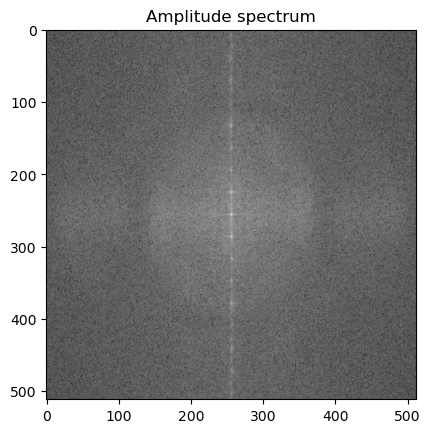

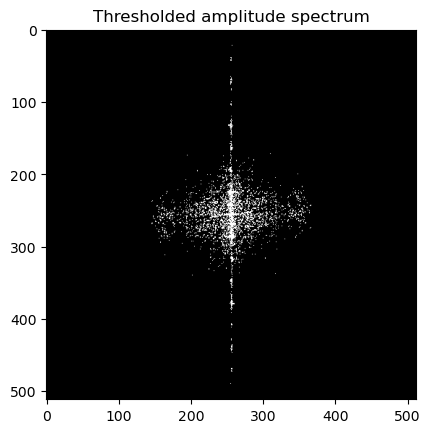



---------------------------------SONNET ROTATED:--------------------------------------------



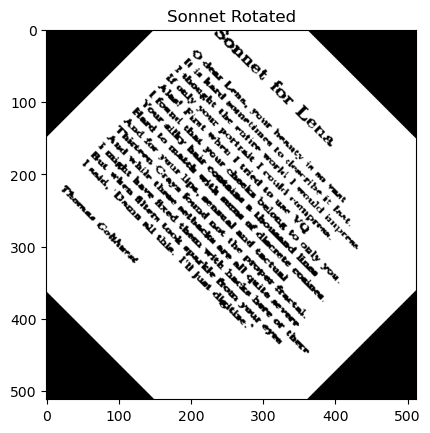

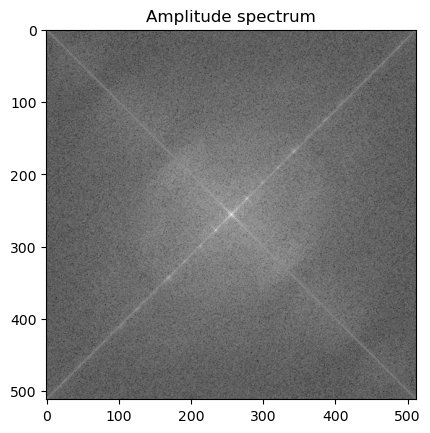

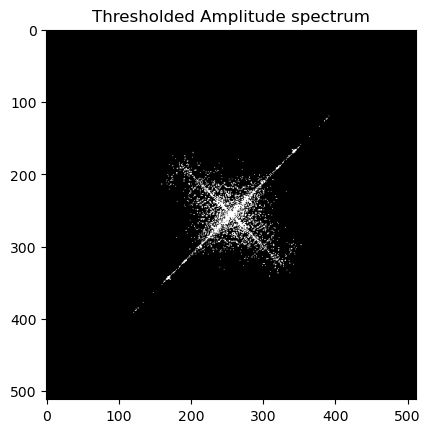

In [128]:
import matplotlib.pyplot as plt

print('SONNET:\n')
complex_son = computeFT(son)
#print('Fourier trasform of image son:\n')
#print(complex_son)
#print('\n\nModule with logaritmic scale:\n')
magnitude_spectrum = toVisualizeLogFT(complex_son)
#print(magnitude_spectrum)

plt.imshow(son, cmap='gray')
plt.title('\n\n----------------------------SONNET---------------------------------------\n\n')
plt.show()
plt.imshow(magnitude_spectrum,cmap='gray')
plt.title('Amplitude spectrum')
plt.show()

#print(np.max(magnitude_spectrum))
#print(np.min(magnitude_spectrum))

threshold = np.log10(np.power(10, 5))
#print(threshold)
magnitude_spectrum = np.where(magnitude_spectrum<threshold, 0, 1)
#print(magnitude_spectrum)
#print(np.max(magnitude_spectrum))
#print(np.min(magnitude_spectrum))
plt.imshow(magnitude_spectrum,cmap='gray')
plt.title('Thresholded amplitude spectrum')
plt.show()

print('\n\n---------------------------------SONNET ROTATED:--------------------------------------------\n')
complex_sonrot = computeFT(sonrot)
#print('Fourier trasform of image sonrot:\n')
#print(complex_sonrot)
#print('\n\nModule with logaritmic scale:\n')
magnitude_spectrum_sonrot = toVisualizeLogFT(complex_sonrot)
#print(magnitude_spectrum)

plt.imshow(sonrot, cmap='gray')
plt.title('Sonnet Rotated')
plt.show()
plt.imshow(magnitude_spectrum_sonrot,cmap='gray')
plt.title('Amplitude spectrum')
plt.show()

#print(np.max(magnitude_spectrum_sonrot))
#print(np.min(magnitude_spectrum_sonrot))

magnitude_spectrum_sonrot = np.where(magnitude_spectrum_sonrot<threshold, 0, 1)
#print(magnitude_spectrum_sonrot)
#print(np.max(magnitude_spectrum_sonrot))
#print(np.min(magnitude_spectrum_sonrot))
plt.imshow(magnitude_spectrum_sonrot,cmap='gray')
plt.title('Thresholded Amplitude spectrum')
plt.show()


The amplitude of the FT represents the distribution of energy in the frequency domain. We find in images that their regions with low frequency are the ones where the color of the pixels evolves slowly from one to the other. On the contrary, the frequencies are higher when the pixel intensity shows a rapid alternation.

The transform image also tells us the dominating directions in the FT of the image.

We can appreciate here the difference between the plotted FTs for Son and SonRot (the second has a visible different orientation from Son), where the dominating directions of the images differ for circa 45 degrees.

3. Interpretation: discuss the results obtained on thresholded FT module. What property of the Fourier transform is shown ?

To find the most relevant frequencies we can threshold the original FT amplitude plot, obtaining a sharper image which highlights the dominant direction of the original FT trasform.

The property shown by applying a threshold to the FT is its Frequency Shifting, as we are able to sharpen the differences in the amplitude spectrum by increasing all the frequencies higher than a certain value (here logarithm in basis 10 of 10^5) and lowering the others, without losing the information carried by the amplitude spectrum itself.

4. Write the function `blend()` getting two images, one float parameter $\alpha\in[0,1]$, calculating $\alpha I_1+(1-\alpha)I_2$ and returning the result. 

In [129]:
def blend(I1,I2,alpha):
    """ Array**2*float -> Array """
    a1 = np.array(I1)
    a2 = np.array(I2)
    return alpha*a1 + (1-alpha)*a2


5. Apply the previous function on images `son` and `sonrot` and $\alpha=\frac12$, compute the Fourier transform, threshold the module and visualize the result. 


Blend function on images son and sonrot:



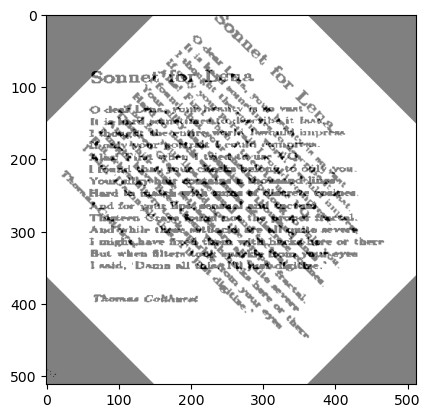



Fourier transform:



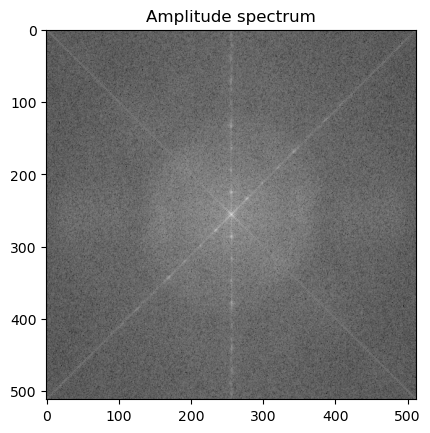

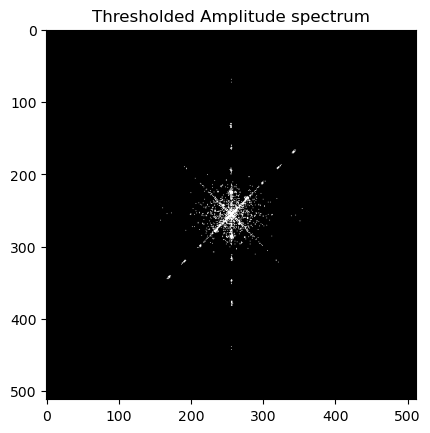

In [130]:
blendedPic = blend(son, sonrot, 0.5)

print('\nBlend function on images son and sonrot:\n')
#print(blendedPic)
plt.imshow(blendedPic, cmap='gray')
plt.show()

ft = fft2(blendedPic)
print('\n\nFourier transform:\n')
#print(ft)
#print('\n\nModule with logaritmic scale:\n')
ms = toVisualizeLogFT(ft)
#print(ms)

plt.imshow(ms,cmap='gray')
plt.title('Amplitude spectrum')
plt.show()

#print(np.max(ms))
#print(np.min(ms))

threshold = 5

ms = np.where(ms<threshold, 0, 1)
#print(ms)
#print(np.max(ms))
#print(np.min(ms))
plt.imshow(ms,cmap='gray')
plt.title('Thresholded Amplitude spectrum')
plt.show()


6. Compare the latter result with those of question 2: what property of the Fourier transform is shown? What is the behaviour of $\alpha$ in the resulting spectrum?

Another important property of the FT is shown in this exercise, the Linearity of the FT: the juxstaposition of the two images results in a frequency spectrum that shows the domains of both the pictures without altering them but just adding them one to another.
This is due to both the linearity of the FT and the FT property for which the result of product of two separate fourier transforms that can be added to one another without having to treat the ft as a whole. 
The Linearity of the FT is not only applicable with the sum of indipendent signals but also with the multiplication of a signal by a constant. 
The FT of a signal multiplied by a constant is equal to the constant multiplied by the FT of the signal.
Here alpha is equal to 0.5, so it reduces the amplitude of the signal - we can apprecate it by observing the new image resulted by the blended function of Son and SonRot

7. We want to determine the text orientation in image `sonrot` and produce a new image with horizontal text. Write the function `rectifyOrientation()` that:

 + computes the FT module of image given in parameter and threshold it at $3\times 10^{5}$,
 + from thresholded module determines the main orientation using the function `mainOrientation()` 
 + produces the rectified image applying a rotation with a suitable angle using `rotateImage()`



Main orientation of the original picture:  84.375


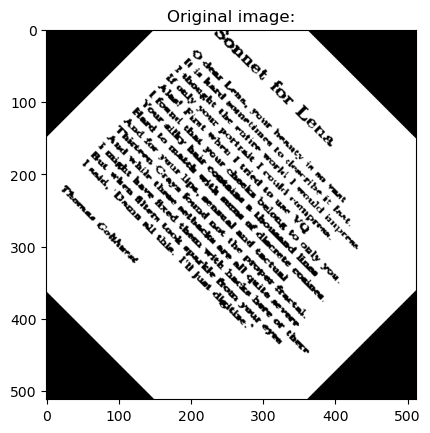

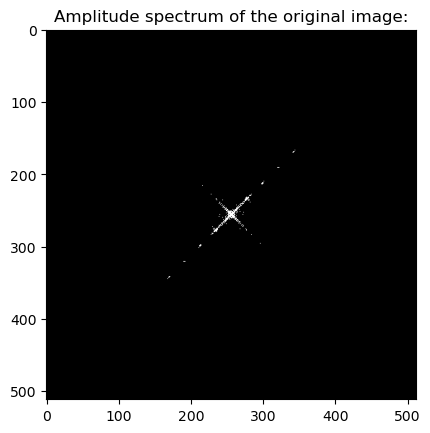

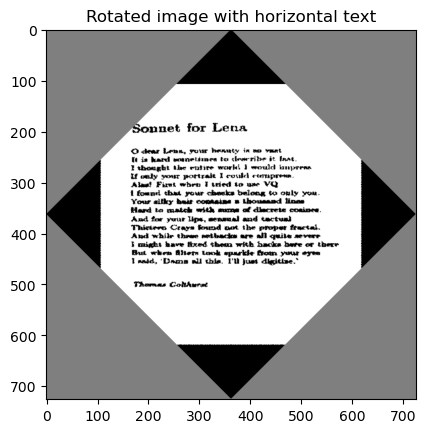

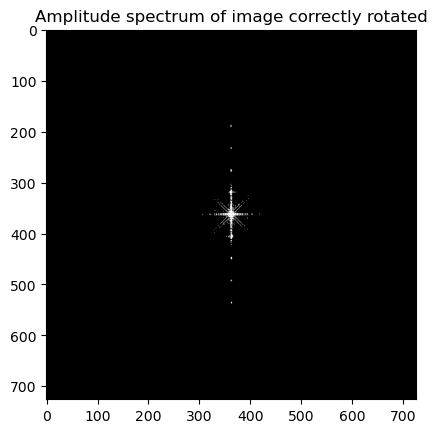

In [131]:
def mainOrientation(I):
    """ Array -> tuple[Iori,float]
        return image of orientation (32 bins) and the main orientation (degree) from a Fourier transform module
    """
    n, m = I.shape

    size = 32
    x = np.array(range(size))
    ori = np.vstack((np.cos(np.pi*x/size), np.sin(np.pi*x/size))).T

    Iori = np.zeros((n, m))
    orients = np.zeros((size))

    for i in range(1,n+1):
        for j in range(1,m+1):
            if I[i-1, j-1] > 0:
                v = np.array([j-m/2, -i + n/2])
                if i > n/2:
                    v = -v
                    prod = np.matmul(ori, v)
                    maxi = prod.max()
                    if maxi > 0:
                        imax = np.nonzero(prod == maxi)
                        Iori[i-1, j-1] = imax[0]
                        orients[imax] += 1

    maxori = np.nonzero(orients == orients.max())[0][0]
    return (Iori, 180*maxori/size - 90)

def rotateImage(I,a):
    """ Array*float -> Array 
        return a rotation of angle a (degree) of image I
    """
    return np.array(Image.fromarray(I).rotate(a, expand=True, fillcolor=127))

####### your code below
def rectifyOrientation(I, thresh, angle):
    ft = computeFT(I)
    log_ft = toVisualizeLogFT(ft)
    
    thresh_image = np.where(log_ft<thresh, 0, 1)
    
    main_orient = mainOrientation(I)
    im_rotated = rotateImage(I, angle)
    
    new_orient = mainOrientation(im_rotated)
    
    ft_rot = computeFT(im_rotated)
    log_ft_rot = toVisualizeLogFT(ft_rot)
    thresh_rotated = np.where(log_ft_rot<thresh, 0, 1)
    
    return I, thresh_image, im_rotated, thresh_rotated, main_orient

th= np.log10(3*np.power(10,5))

im, th, new, th_new, orient = rectifyOrientation(sonrot, th, 45)

print('\n\nMain orientation of the original picture: ', orient[1] )

plt.imshow(im, cmap='gray')
plt.title('Original image:')
plt.show()

plt.imshow(th, cmap='gray')
plt.title('Amplitude spectrum of the original image:')
plt.show()

plt.imshow(new, cmap='gray')
plt.title('Rotated image with horizontal text')
plt.show()

plt.imshow(th_new, cmap='gray')
plt.title('Amplitude spectrum of image correctly rotated')
plt.show()


8. Experiment `rectifyOrientation()` on `sinrot`, and on a rotation of `img/port.jpg` (using `rotateImage()`) with various rotation angles.  

-------------------------SONROT---------------------------------------



Main orientation of the original picture:  84.375


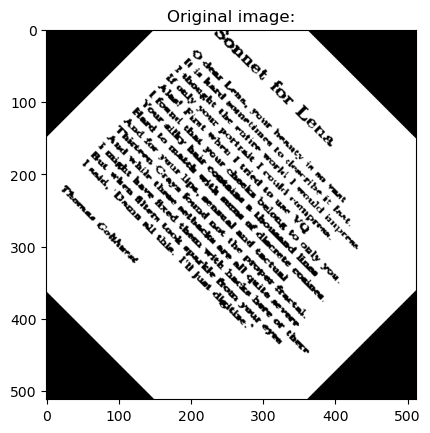

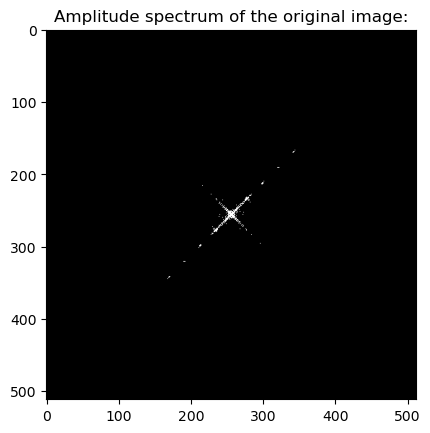

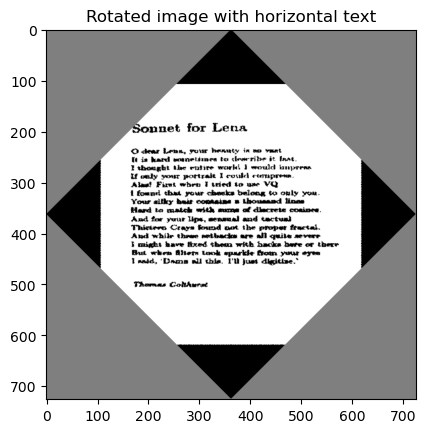

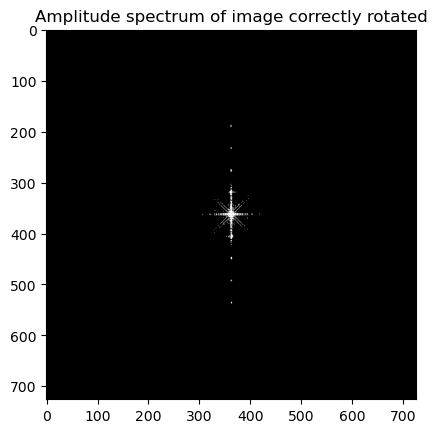



----------------------------------PORT-------------------------------------------------




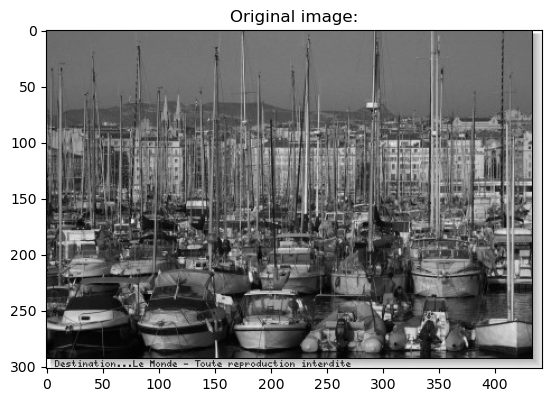

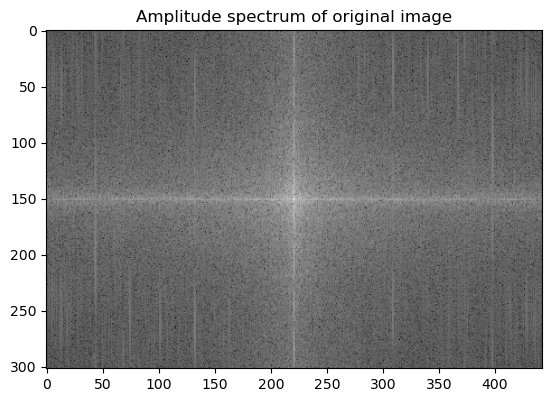

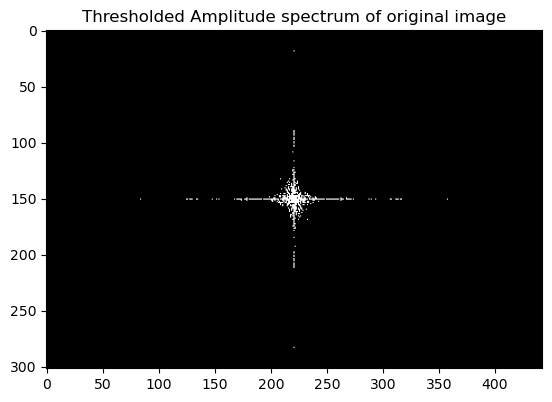

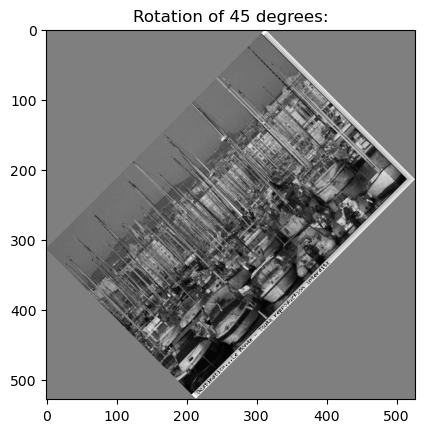

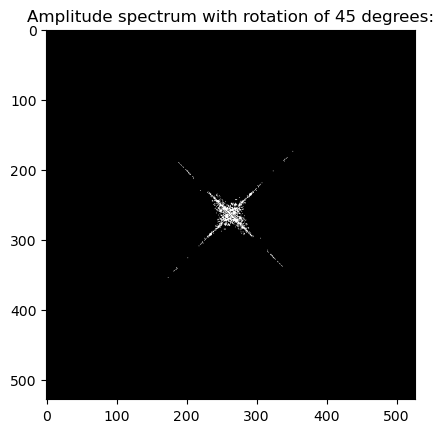

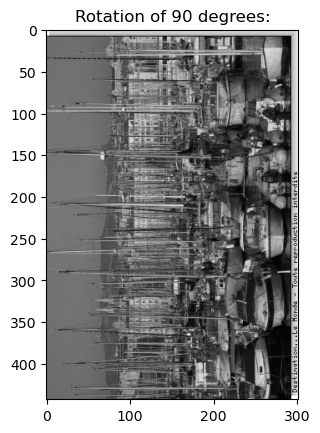

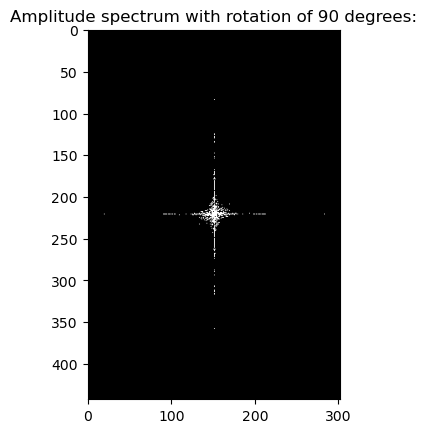

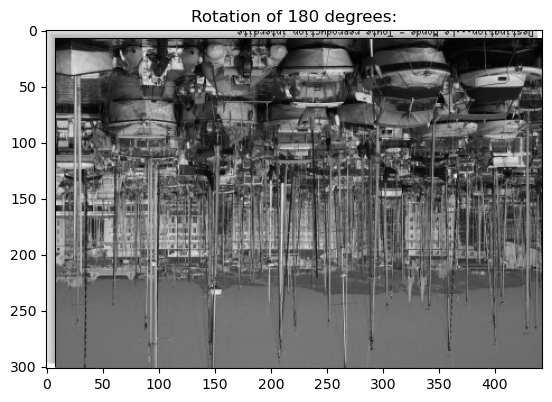

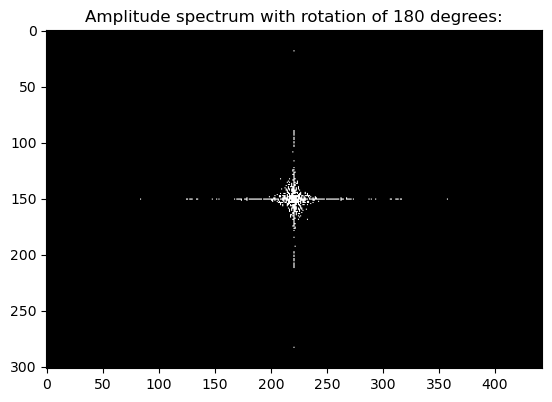

In [132]:
#using rectifyOrientation() on SinRot, returning the image correctly rotated

print('-------------------------SONROT---------------------------------------\n')

th= np.log10(3*np.power(10,5))

im, th, new, th_new, orient = rectifyOrientation(sonrot, th, 45)

print('\n\nMain orientation of the original picture: ', orient[1] )

plt.imshow(im, cmap='gray')
plt.title('Original image:')
plt.show()

plt.imshow(th, cmap='gray')
plt.title('Amplitude spectrum of the original image:')
plt.show()

plt.imshow(new, cmap='gray')
plt.title('Rotated image with horizontal text')
plt.show()

plt.imshow(th_new, cmap='gray')
plt.title('Amplitude spectrum of image correctly rotated')
plt.show()


#experimenting the rectifyOrientation() function with the new image Port, displaying the image at various angles 

print('\n\n----------------------------------PORT-------------------------------------------------\n\n')

port = np.array(Image.open('img/port.jpg'))
plt.imshow(port, cmap='gray')
plt.title('Original image:')
plt.show()

plt.imshow(toVisualizeLogFT(computeFT(port)), cmap='gray')
plt.title('Amplitude spectrum of original image')
plt.show()

thresh_port = np.where(toVisualizeLogFT(computeFT(port))<5, 0, 1)
plt.imshow(thresh_port, cmap='gray')
plt.title('Thresholded Amplitude spectrum of original image')
plt.show()

#changing the image main orientation to different angles

im1, th1, new1, th_new1, orientPort = rectifyOrientation(port, 5, 45)
im2, th2, new2, th_new2, orientPort2 = rectifyOrientation(port, 5, 90)
im3, th3, new3, th_new3, orientPort3 = rectifyOrientation(port, 5, 180)

plt.imshow(new1, cmap='gray')
plt.title('Rotation of 45 degrees:')
plt.show()

plt.imshow(th_new1, cmap='gray')
plt.title('Amplitude spectrum with rotation of 45 degrees:')
plt.show()

plt.imshow(new2, cmap='gray')
plt.title('Rotation of 90 degrees:')
plt.show()

plt.imshow(th_new2, cmap='gray')
plt.title('Amplitude spectrum with rotation of 90 degrees:')
plt.show()

plt.imshow(new3, cmap='gray')
plt.title('Rotation of 180 degrees:')
plt.show()

plt.imshow(th_new3, cmap='gray')
plt.title('Amplitude spectrum with rotation of 180 degrees:')
plt.show()


Experimenting the defined functions on the Port image, we can appreciate better how the not-thresholded amplitude plot show more low frequency areas, since the colors of the image do not present frequent or strong changes.
By thresholding the plot we can fully observe the main directions of the image and of its FT transform, and notice the changes in the orientation of the plot as we modify the orientation of the original picture.